 Elimizdeki resimlerden bazılarını random bir şekilde görselleştirdim.

In [33]:
#önce gerekli kütüphaneleri import ettim.
import os
import random
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg


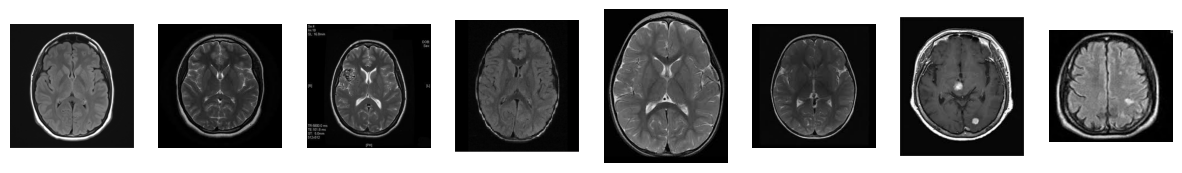

In [34]:
def get_random_images(folder_path, num_images=8):
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')]
    random_images = random.sample(image_paths, num_images)
    return random_images
def show_images(image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))

    for i, path in enumerate(image_paths):
        img = plt.imread(path)
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

if __name__ == "__main__":
    folder_path = "/content/drive/MyDrive/brain/brain_data/Test/no"
    random_image_paths = get_random_images(folder_path)
    show_images(random_image_paths)

Sınıflarımızın isimlerini bulduk.
NO: kanserli değil, YES: kanserli



In [35]:

data_dir = pathlib.Path("/content/drive/MyDrive/brain/brain_data/Train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

class_mappings = {'Kanserli': 1, 'Kansersiz': 0}

['no' 'yes']


Klasörlerdki resim sayılarını yazdırdım

In [36]:
def count_images_in_folder(folder_path, extensions=['.jpg', '.jpeg', '.png', '.gif']):
    count = 0

    # Klasördeki dosyaları kontrol et
    for file_name in os.listdir(folder_path):
        # Dosyanın uzantısını kontrol et
        if any(file_name.lower().endswith(ext) for ext in extensions):
            count += 1

    return count




In [37]:

folder_path = '/content/drive/MyDrive/brain/brain_data/Train/no'
image_count = count_images_in_folder(folder_path)
print(f" Train/no Klasöründeki resim dosyalarının sayısı: {image_count}")

folder_path2="/content/drive/MyDrive/brain/brain_data/Train/yes";
image_count2 = count_images_in_folder(folder_path2)
print(f" Train/yes  Klasöründeki resim dosyalarının sayısı: {image_count2}")

folder_path3="/content/drive/MyDrive/brain/brain_data/Test/no";
image_count3 = count_images_in_folder(folder_path3)
print(f" Test /no Klasöründeki resim dosyalarının sayısı: {image_count3}")

folder_path4="/content/drive/MyDrive/brain/brain_data/Test/yes";
image_count4 = count_images_in_folder(folder_path4)
print(f" Test/yes Klasöründeki resim dosyalarının sayısı: {image_count4}")

 Train/no Klasöründeki resim dosyalarının sayısı: 68
 Train/yes  Klasöründeki resim dosyalarının sayısı: 108
 Test /no Klasöründeki resim dosyalarının sayısı: 29
 Test/yes Klasöründeki resim dosyalarının sayısı: 46


In [38]:
tf.random.set_seed(42)
#Normalizasyon yaptık.
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#train ve test klasörlerini belirttik.
train_dir = "/content/drive/MyDrive/brain/brain_data/Train"
test_dir = "/content/drive/MyDrive/brain/brain_data/Test"



In [39]:
#klasördeki resimleri değişkenlerimize atadık ve klasör içinde resimleri karıştırma,resimlerin boyutlarını belirleme gibi işlemler yaptık.
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=8, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=7,
                                               shuffle=True)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=8,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=7,
                                               shuffle=True)



Found 176 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [40]:
## CNN modelimizi kurduk
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])



In [50]:
model_1.summary() #CNN yapımızın genel özeti

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [41]:
# modelizimi compile ettik.
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# modelimizi fit ediyoruz.
history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data=valid_data,
                        batch_size=32)

Epoch 1/5
22/22 [==============================] - 3s 64ms/step - loss: 0.6193 - accuracy: 0.7102 - val_loss: 0.4865 - val_accuracy: 0.7733
Epoch 2/5
22/22 [==============================] - 1s 58ms/step - loss: 0.5032 - accuracy: 0.7727 - val_loss: 0.3835 - val_accuracy: 0.8533
Epoch 3/5
22/22 [==============================] - 1s 56ms/step - loss: 0.4339 - accuracy: 0.8068 - val_loss: 0.3067 - val_accuracy: 0.8533
Epoch 4/5
22/22 [==============================] - 1s 56ms/step - loss: 0.3033 - accuracy: 0.8466 - val_loss: 0.1482 - val_accuracy: 0.9733
Epoch 5/5
22/22 [==============================] - 1s 60ms/step - loss: 0.1202 - accuracy: 0.9659 - val_loss: 0.0481 - val_accuracy: 0.9867


In [42]:
# train loss,validation loss, train accuracy ve validation accuracy grafiğini çizdirdim. Bu grafiklerden modelimin overfit ya da underfit olması durumunu kontrol edebilirim.
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


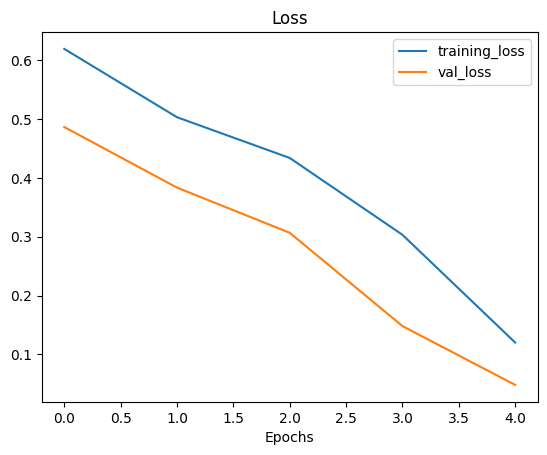

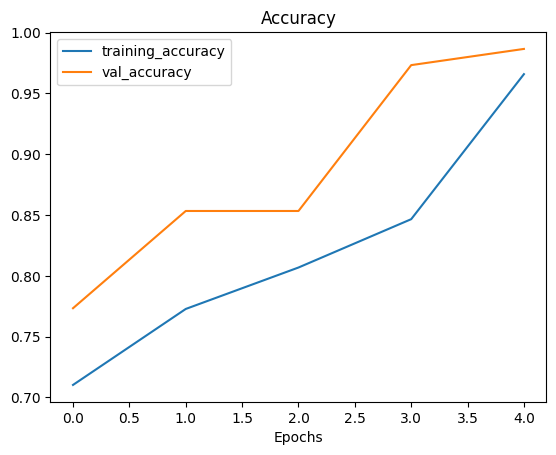

In [43]:

plot_loss_curves(history_1)

In [44]:
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

  ##burada ise tahmin etme işlemi için bir fonksiyon yazdık.
  ##vereceğimiz resimleri istediğimiz şekile döndürecek ve bu sekilde modelimize bu dönüştürülmüş resimi vereceğiz.
  #resim preprocessing işlemi


In [45]:
mr = load_and_prep_image("/content/drive/MyDrive/brain/brain_data/Train/no/11 no.jpg")
mr

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [46]:
# resmimize extra boyut ekliyoruz. çünkü biz verimizi eğitirken batches'lara dnüştürmüştük. bu yüzden veriler bu şekilde eğitildi. birinci boyut batch_size olmuş oldu.
#bu işlemi yaptıktan sonra tahmin işlemini yapabileceğiz.
print(f"Shape before new dimension: {mr.shape}")
mr = tf.expand_dims(mr, axis=0)
print(f"Shape after new dimension: {mr.shape}")
mr

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dty

In [47]:
#tahmin etme işlemi
pred = model_1.predict(mr)
pred

1/1 [==============================] - 0s 404ms/step


array([[0.02474578]], dtype=float32)

In [48]:
#bu fonksiyon ise resim önilemeden geçirildikten sonra onu modele verecek ve tahmin edilen değeri resim üzerinde olacak şekilde yazmasını sağlayacak.
def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 17ms/step


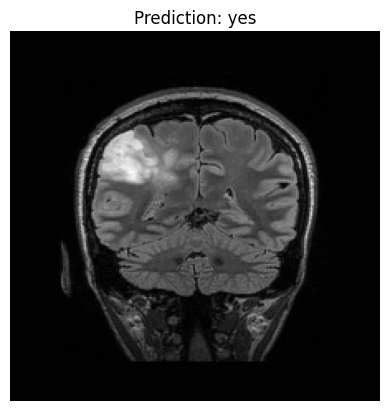

In [49]:
pred_and_plot(model_1, "/content/drive/MyDrive/brain/ornek resimler/oligodendroglioma-banner.jpg", class_names)



In [51]:
#modelimizi kaydetip başka yerlerde çağırarak tahmin işlemini yapabiliriz.
model_1.save("beyin_kanser_modeli")